In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from ipywidgets import interact
import ipywidgets as widgets

In [97]:
def left_bord(t):
    return 273+60

def right_bord(t):
    return 273+60

def u0(x):
    return 20*(x<0.1)+60*(x==0.1)+100*(x>0.1) + 273

bord_cond = (left_bord, right_bord)

class Elliptic:
    def __init__(self, end_time, xlim, u0, border_cond):
        self.a = 1.11e-4
        self.dt, self.dx = 0.001, 0.001
        self.T = np.linspace(0, end_time, end_time*100+1)
        a, b = xlim
        self.X = np.linspace(a,b, 101)
        self.left, self.right = border_cond
        self.c = 0.26
        self.A, self.A_inv = self.calc_A()
        self.u0 = u0
    
    def calc_A(self):
        n = len(self.X)
        line = np.array([-self.c*self.dt*self.a/self.dx**2, 1 + 2*self.c*self.a*self.dt/self.dx**2, -self.c*self.dt*self.a/self.dx**2])
        A = [[1]+[0]*(n-1)]
        for i in range(n-2):
            A_line = np.zeros(n)
            A_line[i:i+3] = line
            A.append(A_line)
        A.append([0]*(n-1) + [1])
        print(np.vstack(A))
        return np.vstack(A), np.linalg.inv(A)
    
    def initials(self):
        U0 = self.u0(self.X)
        U1 = U0 + self.init['du_dt0'](self.X)*self.dt
        U1[-1] = self.right(self.dt)
        U1[0] = self.left(self.dt)
        return U0, U1
        
    def right_part(self, t_next, cur):
        cur_u_l = cur[:-2]
        cur_u_c = cur[1:-1]
        cur_u_r = cur[2:]
        B_middle = cur_u_c + (1-self.c)*self.a*self.dt*(cur_u_r-2*cur_u_c+cur_u_l)/self.dx**2
        B = np.concatenate([[self.left(t_next)],B_middle, [self.right(t_next)]])
        return B
    
    @staticmethod
    def solve_sys(A_inv, B):
        return A_inv @ B
        
    def solve_eq(self):
        u0 = self.u0(self.X)
        solution = [u0]
        for t in self.T[2:]:
            B = self.right_part(t, solution[-1])
            _cur = self.solve_sys(self.A_inv, B)            
            solution.append(_cur)
        
        self.solution = solution
            
    def plot_solution(self, t):
        idx = (np.abs(self.T-t)).argmin()
        calculated = self.solution[idx]
        
        font = {'weight' : 'bold', 'size'   : 10}
        plt.rc('font', **font)
        plt.figure(figsize=(10,5))
        plt.plot(self.X, calculated)
        plt.title(f'Sutulion {np.round(self.T[idx], 1)}')
        plt.legend(['numeral','real'], loc='upper left')
        plt.ylim(292, 374)
        return plt.show()
        
            

In [98]:
T = 100
eq = Elliptic(T, (0,0.2), u0, bord_cond)

[[ 1.       0.       0.      ...  0.       0.       0.     ]
 [-0.02886  1.05772 -0.02886 ...  0.       0.       0.     ]
 [ 0.      -0.02886  1.05772 ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  1.05772 -0.02886  0.     ]
 [ 0.       0.       0.      ... -0.02886  1.05772 -0.02886]
 [ 0.       0.       0.      ...  0.       0.       1.     ]]


In [99]:
eq.solve_eq()

In [100]:
interact(eq.plot_solution, t=widgets.FloatSlider(value=0, min=0, max=T, step=0.1))

interactive(children=(FloatSlider(value=0.0, description='t'), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

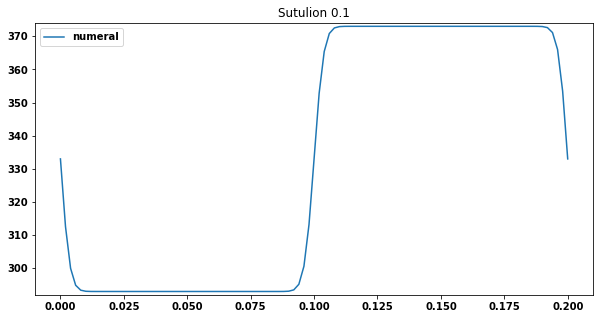

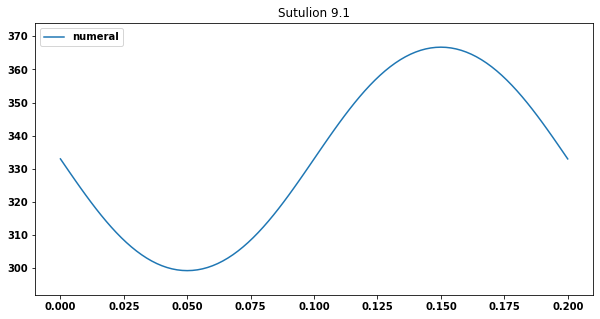

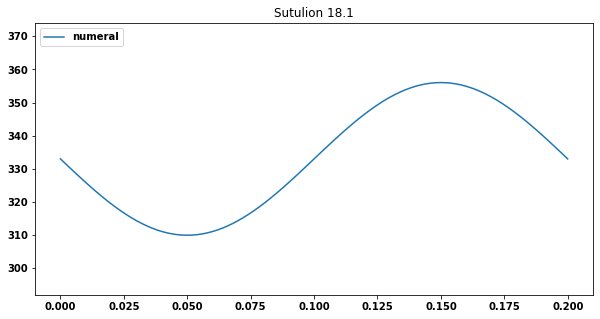

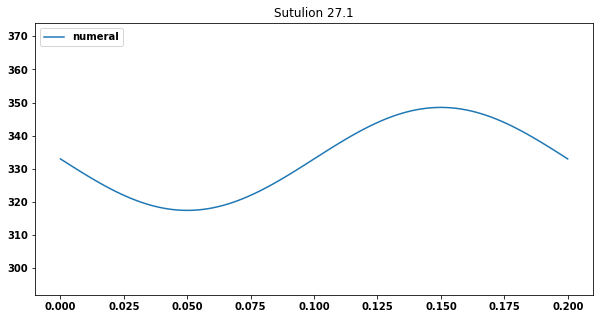

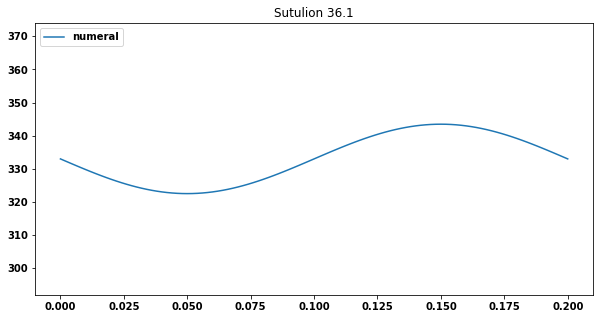

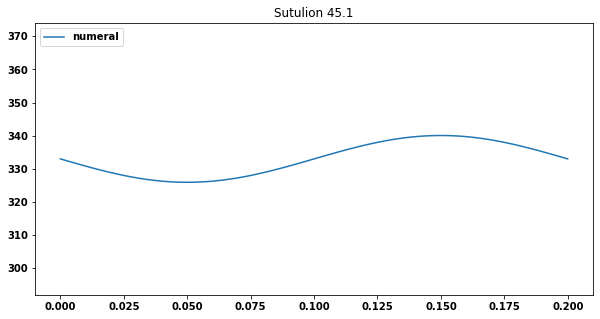

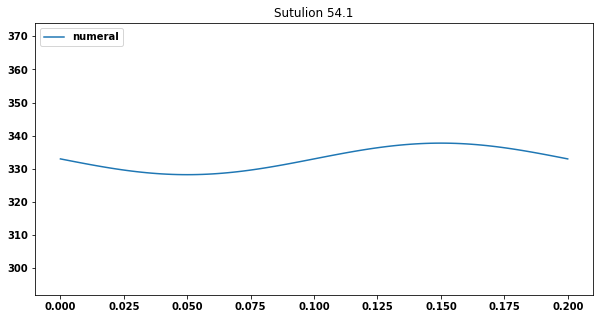

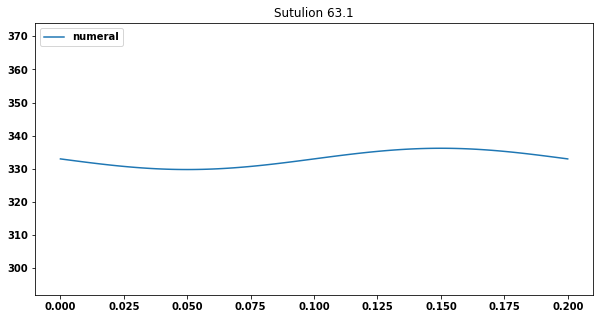

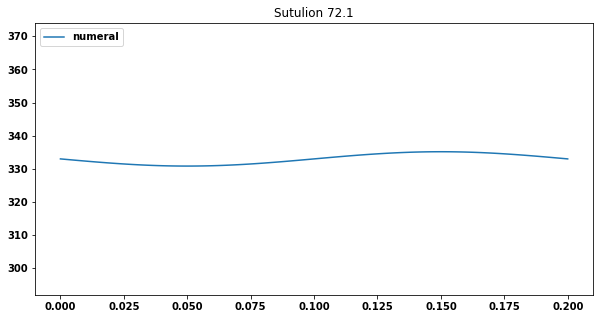

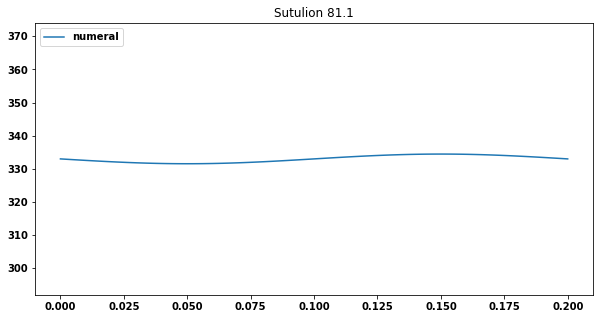

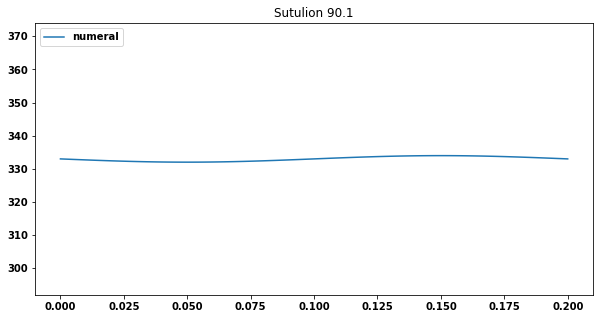

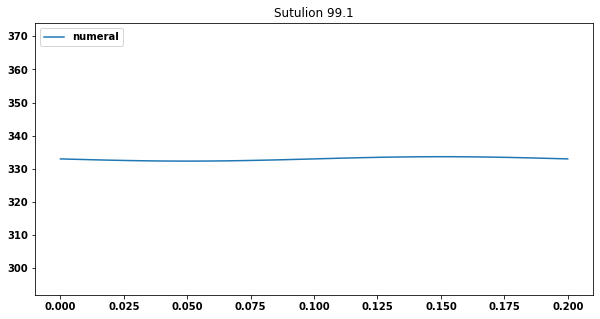

In [101]:
for t in np.arange(0.1, 100, 9):
    eq.plot_solution(t)
    